In [1]:
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from beakerx import *
import seaborn as sns
#import h5py
import os
from tqdm import tqdm_notebook as tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
from scipy.io import loadmat
from matplotlib.mlab import griddata
from ipywidgets import interact, FloatSlider,IntSlider, RadioButtons,Dropdown,Tab,Text,SelectMultiple,FloatRangeSlider
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from mpl_toolkits.mplot3d.axes3d import *
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from IPython.core.display import HTML,Image
from functools import reduce
from bokeh.io import output_notebook, show
output_notebook()
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import roc_curve,roc_auc_score,auc,precision_recall_curve,average_precision_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.neighbors import NearestNeighbors
from bokeh.palettes import Category20c

Populating the interactive namespace from numpy and matplotlib


Loading BokehJS ...

In [2]:
cd /Users/james/NS_model

/Users/james/NS_model


In [3]:
# setup figure template
figure_template_path = 'bin/'
if figure_template_path not in sys.path:
    sys.path.append(figure_template_path)
from importlib import reload
import figure_template
# force reload of the module
reload(figure_template)
from figure_template import std_plot,display_dataframe, embed_pdf_figure, embed_pdf_pages
fontlegend = {'family':'Arial',
                  'weight' : 'normal', 
              #'linewidth':0.5,
                  'size' : 6.5*1}

In [4]:
pd.read_excel('data/national_debt.xlsx',index_col=0)

,证券简称,到期日期,每年付息次数,收盘价(全价) [交易日期] 最新收盘日 [单位] 元,债券初始面值 [单位] 元,债券最新面值 [交易日期] 最新收盘日,票面利率(发行时) [单位] %
证券代码,,,,,,,
010007.IB,01国债7,2021-07-31,2.0,100.7178,100.0,100.0,4.2600
010011.IB,01国债11,2021-10-23,2.0,107.0945,100.0,100.0,3.8500
020005.IB,02国债05,2032-05-24,2.0,96.9965,100.0,100.0,2.9000
030003.IB,03国债03,2023-04-17,2.0,101.5599,100.0,100.0,3.4000
030014.IB,03国债14,2033-12-15,1.0,100.4853,100.0,100.0,1.6400
050004.IB,05国债04,2025-05-15,2.0,107.1015,100.0,100.0,4.1100
050012.IB,05国债12,2020-11-15,2.0,103.2662,100.0,100.0,3.6500
060009.IB,06国债09,2026-06-26,2.0,104.9614,100.0,100.0,3.7000
060019.IB,06国债19,2021-11-15,2.0,101.4188,100.0,100.0,3.2700


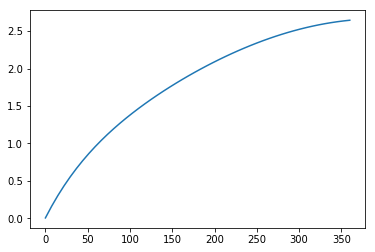

In [5]:
from nelson_siegel_svensson import NelsonSiegelSvenssonCurve

y = NelsonSiegelSvenssonCurve(-20.88281 ,20.88888,   9.98873,  62.66161,  84.02785, 359.98924)
t = np.linspace(0, 360)
plot(t, y(t))

$$
y ( \tau ) = \beta _ { 1 } + \beta _ { 2 } \left[ \frac { 1 - \exp \left( - \tau / \lambda _ { 1 } \right) } { \tau / \lambda _ { 1 } } \right] + \beta _ { 3 } \left[ \frac { 1 - \exp \left( - \tau / \lambda _ { 1 } \right) } { \tau / \lambda _ { 1 } } - \exp \left( - \tau / \lambda _ { 1 } \right) \right] + \beta _ { 4 } \left[ \frac { 1 - \exp \left( - \tau / \lambda _ { 2 } \right) } { \tau / \lambda _ { 2 } } - \exp \left( - \tau / \lambda _ { 2 } \right) \right]
$$

In [6]:
def plot_r_nss_curve(beta_1,beta_2,beta_3, beta_4,lambda1,lambda2,tau):
    part1 = beta_1
    part2 = beta_2*((1-np.exp(-tau/lambda1))/(tau/lambda1))
    part3 = beta_3*((1-np.exp(-tau/lambda1))/(tau/lambda1)-np.exp(-tau/lambda1))
    part4 = beta_4*((1-np.exp(-tau/lambda2))/(tau/lambda2)-np.exp(-tau/lambda2))
    return part1+part2+part3+part4

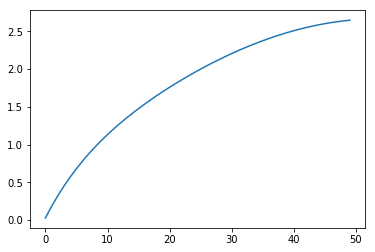

In [7]:
plt.plot(plot_r_nss_curve(-20.88281 ,20.88888, 9.98873,  62.66161,  84.02785, 359.98924,t+1))